# E-COMMERCE DATA ANALYSIS

### Analyzing e-commerce data to understand customer behavior and sales trends
### Dataset: kaggle - E-commerce Data

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [5]:
# Read the dataset
df = pd.read_csv(r"C:\Users\okead\Downloads\E-Commerce Dataset.csv", encoding='ISO-8859-1')



In [6]:
# Display the first few rows of the dataframe to verify its contents
print(df.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  


In [8]:
# Convert InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Calculate total amount
df['TotalAmount'] = df['Quantity'] * df['UnitPrice']

# Basic cleaning
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]
df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]

print("Dataset overview:")
print(df.head())
print("\
Basic statistics:")
print(df.describe())

Dataset overview:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  TotalAmount  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom        15.30  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom        20.34  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom        22.00  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom        20.34  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom        20.34  
Basic statistics:
            Quantity                    InvoiceDate      UnitPrice  \
count

C:\Users\okead\AppData\Local\Temp\ipykernel_11916\3474037711.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.set_index('InvoiceDate').resample('M')['TotalAmount'].sum().plot()


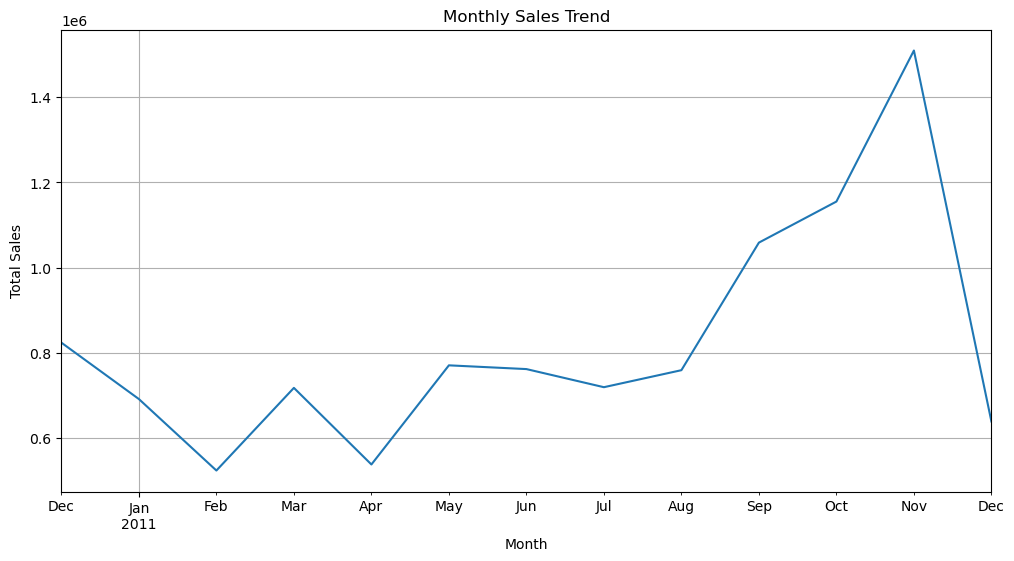

In [9]:
# Analyze sales trends over time
plt.figure(figsize=(12, 6))
df.set_index('InvoiceDate').resample('M')['TotalAmount'].sum().plot()
plt.title('Monthly Sales Trend')
plt.ylabel('Total Sales')
plt.xlabel('Month')
plt.grid(True)
plt.show()

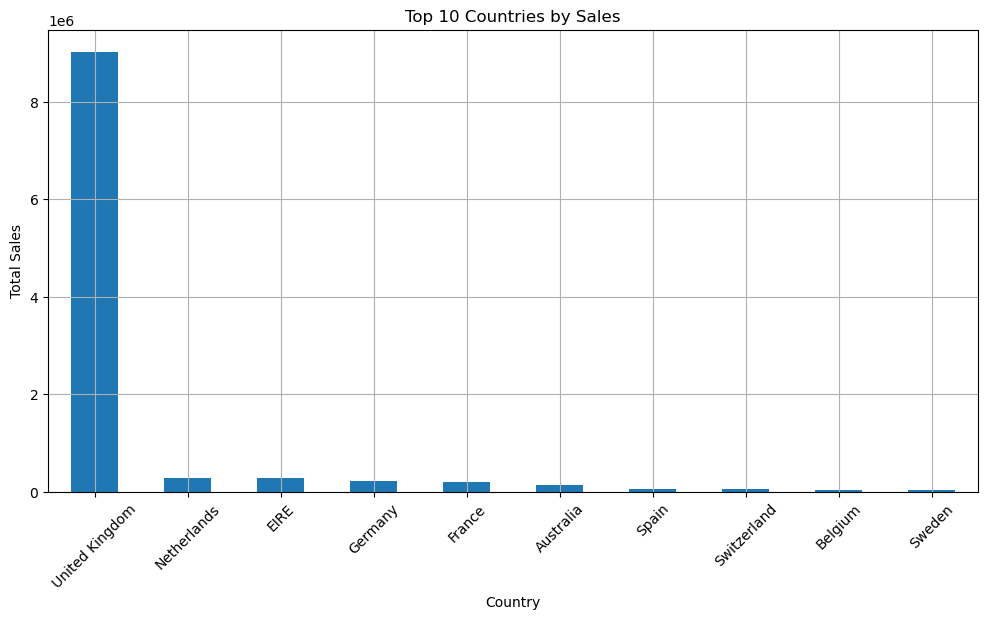

In [10]:
# Analyze sales distribution by country
country_sales = df.groupby('Country')['TotalAmount'].sum().sort_values(ascending=False)

# Plot the top 10 countries by sales
plt.figure(figsize=(12, 6))
country_sales.head(10).plot(kind='bar')
plt.title('Top 10 Countries by Sales')
plt.ylabel('Total Sales')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [11]:
# Calculate RFM metrics
last_date = df['InvoiceDate'].max()

rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (last_date - x.max()).days,  # Recency
    'InvoiceNo': 'count',  # Frequency
    'TotalAmount': 'sum'  # Monetary
}).reset_index()

rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

print("RFM Metrics Summary:")
print(rfm.describe())

RFM Metrics Summary:
         CustomerID      Recency    Frequency       Monetary
count   4338.000000  4338.000000  4338.000000    4338.000000
mean   15300.408022    91.536422    91.720609    2054.266460
std     1721.808492   100.014169   228.785094    8989.230441
min    12346.000000     0.000000     1.000000       3.750000
25%    13813.250000    17.000000    17.000000     307.415000
50%    15299.500000    50.000000    41.000000     674.485000
75%    16778.750000   141.000000   100.000000    1661.740000
max    18287.000000   373.000000  7847.000000  280206.020000


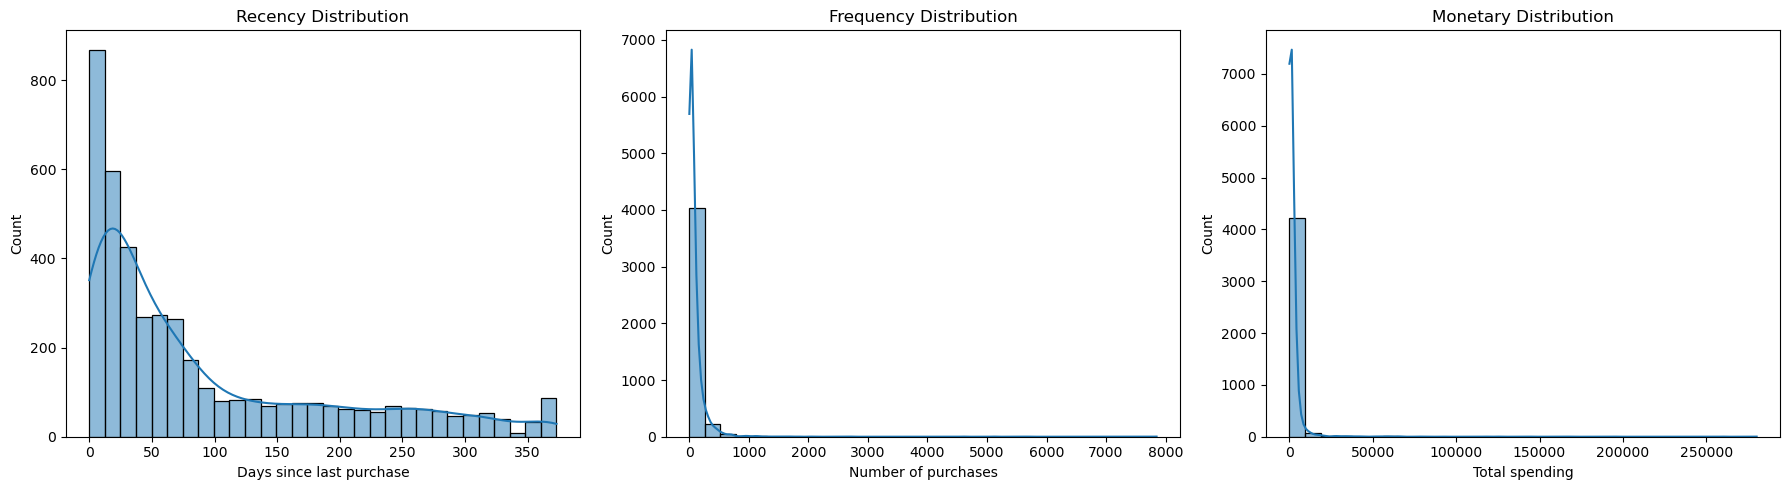

In [12]:
# Visualize RFM distribution
plt.figure(figsize=(18, 5))

# Recency distribution
plt.subplot(1, 3, 1)
sns.histplot(rfm['Recency'], bins=30, kde=True)
plt.title('Recency Distribution')
plt.xlabel('Days since last purchase')

# Frequency distribution
plt.subplot(1, 3, 2)
sns.histplot(rfm['Frequency'], bins=30, kde=True)
plt.title('Frequency Distribution')
plt.xlabel('Number of purchases')

# Monetary distribution
plt.subplot(1, 3, 3)
sns.histplot(rfm['Monetary'], bins=30, kde=True)
plt.title('Monetary Distribution')
plt.xlabel('Total spending')

plt.tight_layout()
plt.show()

## Based on the analysis, here are the key insights:

## 1.Sales Trends:
### - Strong seasonal patterns with peaks during winter months (likely holiday season)
### - Overall upward trend in sales throughout the year
##  2.Geographic Distribution:
### - United Kingdom dominates sales, indicating a highly concentrated market
### - Significant opportunity for international market expansion
## 3.Customer Behavior (RFM Analysis):
### - Average customer makes a purchase every 91 days
### - Typical purchase frequency is 41 orders (median)
### - Wide range in monetary value ($3.75 to $280,206)
### - Most customers are concentrated in the lower-to-medium spending range

## Recommendations:

### 1.Implement targeted marketing campaigns during off-peak seasons
### 2.Develop market entry strategies for high-potential countries
### 3.Create loyalty programs for high-value customers
### 4.Focus on customer retention for those showing declining engagement
### 5.Consider personalized pricing strategies based on customer segments